In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('/content/data_needed_for_modeling .csv')

In [20]:
numerical_features = [
    'latitude', 'longitude', 'accommodates', 'bathrooms', 'beds', 'availability_365',
    '"Smoke alarm"', '"Wifi"', '"Carbon monoxide alarm"', '"Kitchen"', '"Essentials"',
    '"Hangers"', '"Hot water"', 'has_email', 'has_phone', 'has_work_email',
    'room_type_Entire home/apt', 'room_type_Hotel room', 'room_type_Private room',
    'room_type_Shared room', 'property_type_Entire_home', 'property_type_Entire_rental_unit',
    'property_type_Private_room_in_home', 'property_type_Entire_condo', 'property_type_Entire_guesthouse',
    'property_type_Entire_guest_suite', 'property_type_Private_room_in_rental_unit', 'property_type_Entire_townhouse',
    'property_type_Other', 'city_los_angeles', 'city_oakland', 'city_pacific_grove', 'city_portland',
    'city_san_diego', 'city_san_francisco', 'city_san_mateo', 'city_santa_clara', 'city_santa_cruz', 'city_seattle'
]
y = np.round(data['review_scores_rating'] * 2) / 2  # Round to the nearest 0.5
y = (y * 2).astype(int)
X = data[numerical_features]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize the RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

#  Train the model
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)


In [23]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8140


In [24]:
target_names = [str(i / 2) for i in np.unique(y)]  # Use unique class values for target names
report = classification_report(y_test, y_pred, target_names=target_names, zero_division=1)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

         1.0       1.00      0.00      0.00         5
         2.0       0.00      0.00      0.00         4
         2.5       1.00      0.00      0.00         1
         3.0       0.00      0.00      0.00        16
         3.5       1.00      0.00      0.00         9
         4.0       0.00      0.00      0.00        51
         4.5       0.33      0.05      0.09       273
         5.0       0.83      0.98      0.90      1641

    accuracy                           0.81      2000
   macro avg       0.52      0.13      0.12      2000
weighted avg       0.73      0.81      0.75      2000



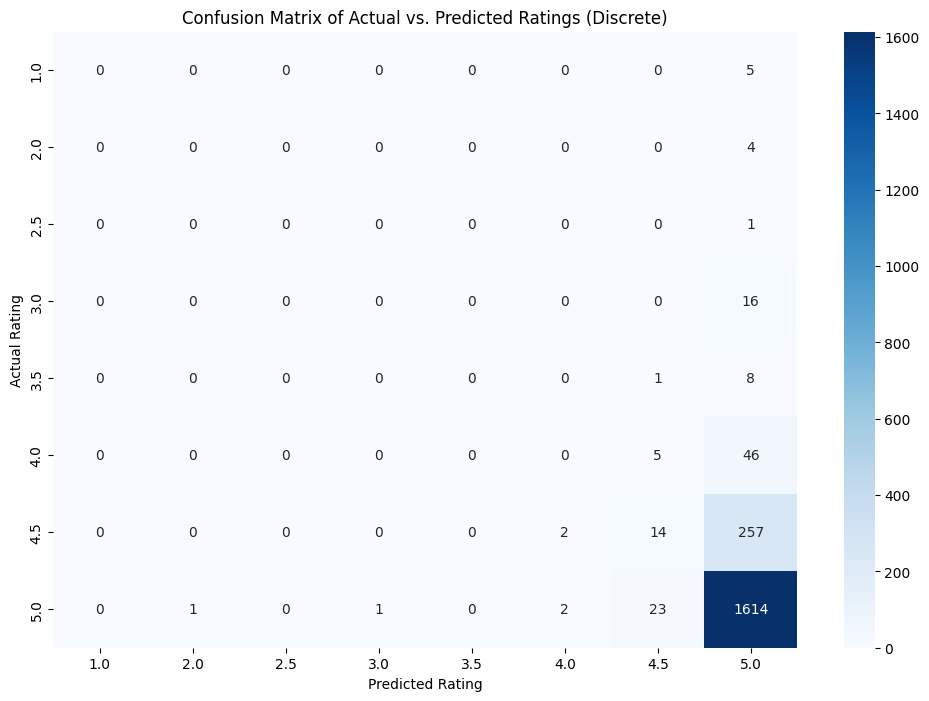

In [25]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted Rating")
plt.ylabel("Actual Rating")
plt.title("Confusion Matrix of Actual vs. Predicted Ratings (Discrete)")
plt.show()

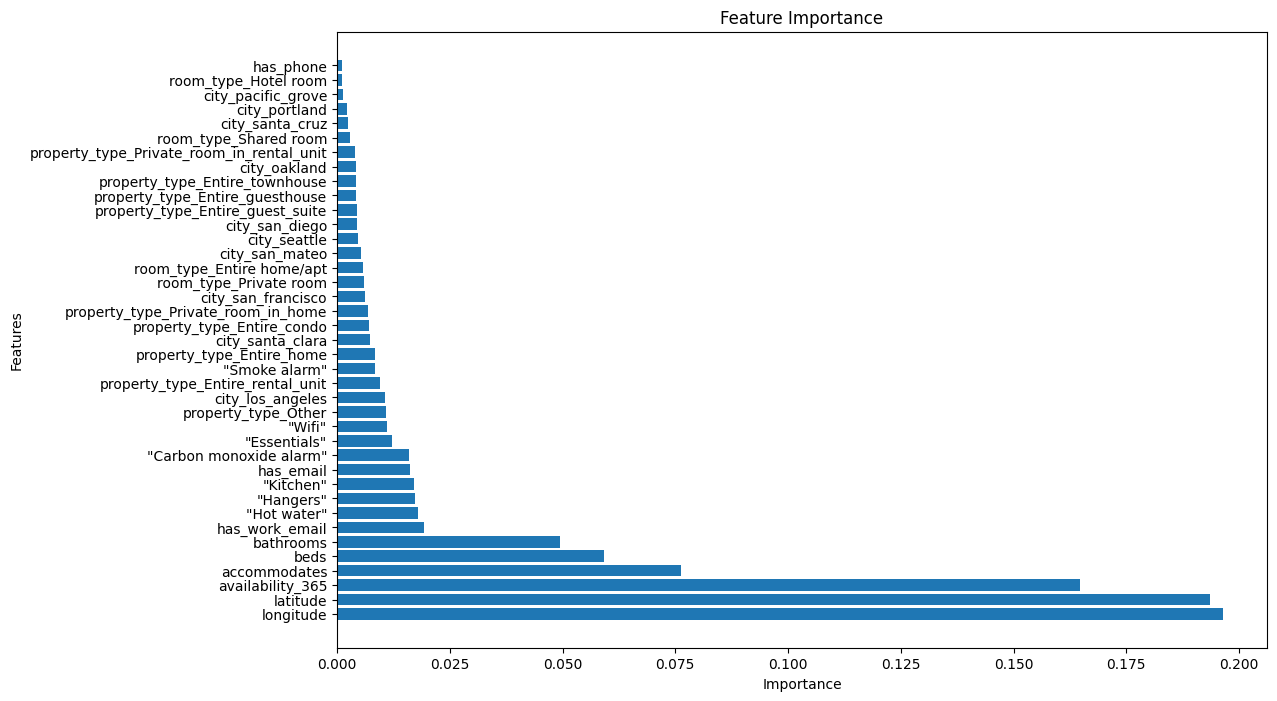

In [26]:
#plotting feature importance graph
importances = classifier.feature_importances_

feature_names = X_train.columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title("Feature Importance")
plt.barh(range(len(importances)), importances[indices], align="center")
plt.yticks(range(len(importances)), [feature_names[i] for i in indices])
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()
